<a href="https://colab.research.google.com/github/Dicti93/MLSEM/blob/master/4.%20EDA/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LassoCV, ElasticNetCV
from sklearn.feature_selection import mutual_info_classif

# Display Settings
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.width', 240)

In [2]:
!wget 'https://raw.githubusercontent.com/Dicti93/MLSEM/master/3.%20Data%20Preparation/clean_data.csv' -O clean_data.csv

# Load the downloaded CSV files into pandas DataFrames
data = pd.read_csv('clean_data.csv')

Der Befehl "wget" ist entweder falsch geschrieben oder
konnte nicht gefunden werden.


In [3]:
X = data.drop('Diagnosis', axis=1)  # Features
y = data['Diagnosis']               # Target variable

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
demographic = ['Age', 'Sex', 'Height', 'Weight', 'BMI', 'Length_of_Stay']

scoring = ['Alvarado_Score', 'Paedriatic_Appendicitis_Score']

clinical = ['Peritonitis', 'Migratory_Pain', 'Lower_Right_Abd_Pain', 'Contralateral_Rebound_Tenderness',
            'Ipsilateral_Rebound_Tenderness', 'Coughing_Pain', 'Psoas_Sign', 'Nausea', 'Loss_of_Appetite',
            'Body_Temperature', 'Dysuria', 'Stool']

laboratory = ['WBC_Count', 'RBC_Count', 'Hemoglobin', 'RDW', 'Thrombocyte_Count',
             'Neutrophil_Percentage', 'Neutrophilia', 'Segmented_Neutrophils',
             'CRP', 'Ketones_in_Urine', 'RBC_in_Urine', 'WBC_in_Urine']

ultrasound = ['US_Performed', 'Appendix_on_US', 'Appendix_Diameter', 'Free_Fluids', 'Appendix_Wall_Layers', 
              'Target_Sign', 'Perfusion', 'Surrounding_Tissue_Reaction','Pathological_Lymph_Nodes', 
              'Bowel_Wall_Thickening', 'Ileus', 'Coprostasis', 'Meteorism', 'Enteritis', 'Appendicolith', 
              'Perforation', 'Appendicular_Abscess', 'Conglomerate_of_Bowel_Loops', 'Gynecological_Findings']

In [5]:
X[demographic].describe()

,Age,Sex,Height,Weight,BMI,Length_of_Stay
count,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000
mean,11.341831,0.517254,147.963226,43.165007,286.866080,4.285897
std,3.529811,0.499704,19.498782,17.377129,7484.227448,2.571048
min,0.000000,0.000000,53.000000,3.960000,7.830000,1.000000
25%,9.197500,0.000000,137.000000,29.500000,15.780000,3.000000
50%,11.440000,1.000000,149.306250,41.400000,18.070000,3.000000
75%,14.040000,1.000000,162.075000,54.000000,21.057500,5.000000
max,18.360000,1.000000,192.000000,103.000000,209041.950113,28.000000


## Distribution of Diagnosis

<Axes: xlabel='Diagnosis', ylabel='count'>

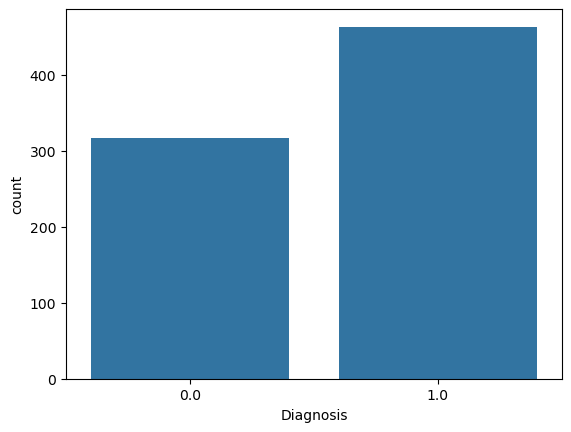

In [6]:
sns.countplot(x='Diagnosis', data=data)

In [7]:
prop = y.value_counts()[1] / len(y)

print("Proportion of Appendicitis:", round(prop,2))
print("Proportion of non Appendicitis:", round(1-prop,2))

Proportion of Appendicitis: 0.59
Proportion of non Appendicitis: 0.41


## Correlation Analysis

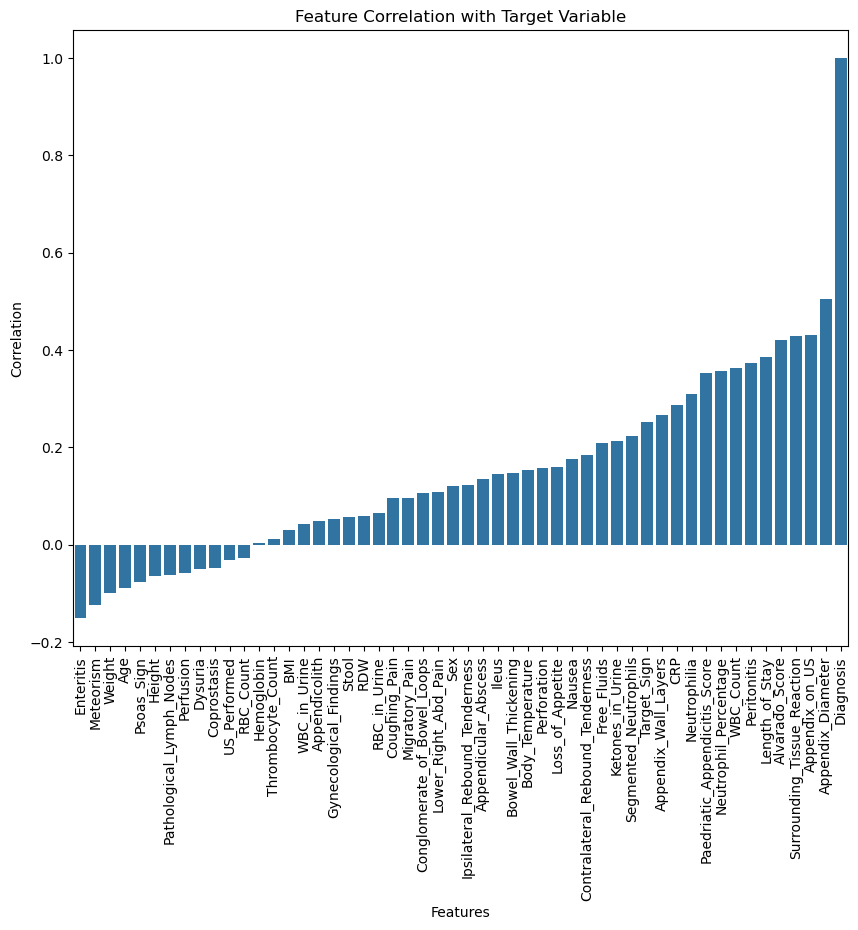

In [8]:
feature_target_corr = data.corrwith(data['Diagnosis'])
sorted_corr = feature_target_corr.sort_values()

plt.figure(figsize=(10, 8))
sns.barplot(x=sorted_corr.index, y=sorted_corr.values)
plt.title('Feature Correlation with Target Variable')
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.show()

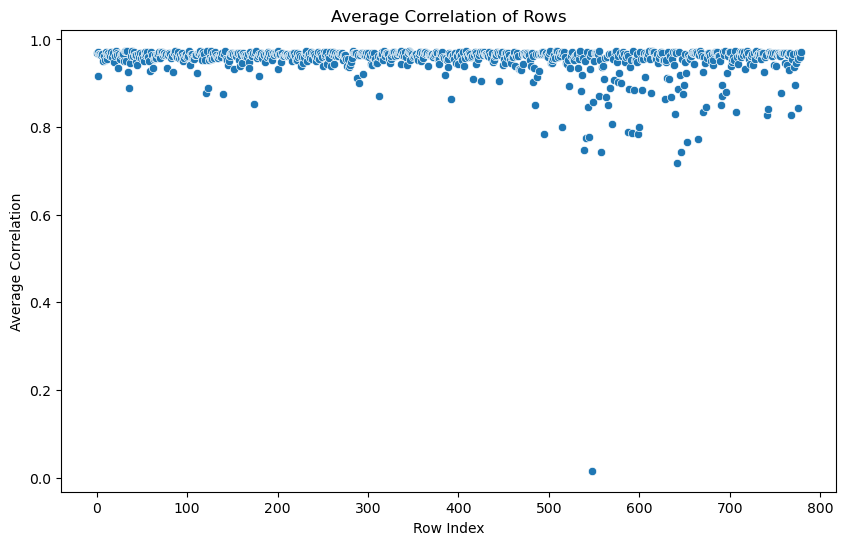

In [9]:
data_transposed = data.transpose()
correlation_rows = data_transposed.corr()
mean_correlation_rows = correlation_rows.mean(axis=1)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=mean_correlation_rows.index, y=mean_correlation_rows, data=data)
plt.xlabel('Row Index')
plt.ylabel('Average Correlation')
plt.title('Average Correlation of Rows')
plt.show()

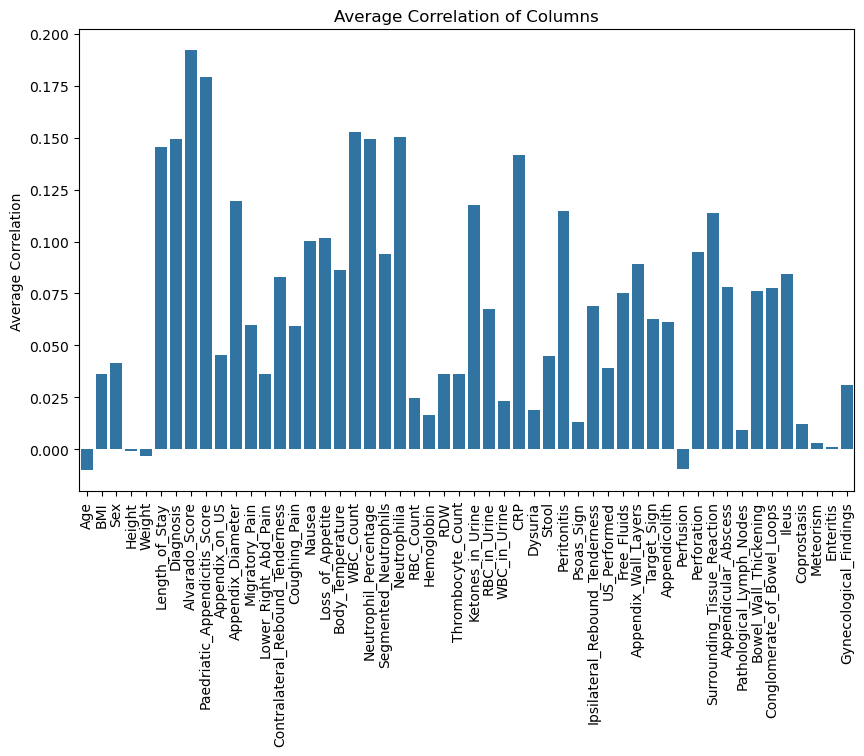

In [10]:
correlation_columns = data.corr()
mean_correlation_columns = correlation_columns.mean(axis=1)
mean_correlation_columns = mean_correlation_columns.reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='index', y=0, data=mean_correlation_columns)
plt.xlabel('')
plt.ylabel('Average Correlation')
plt.title('Average Correlation of Columns')
plt.xticks(rotation=90)
plt.show()

# Supervised Feature Selection

## Information Gain (Demographic + Scoring + Clinical)

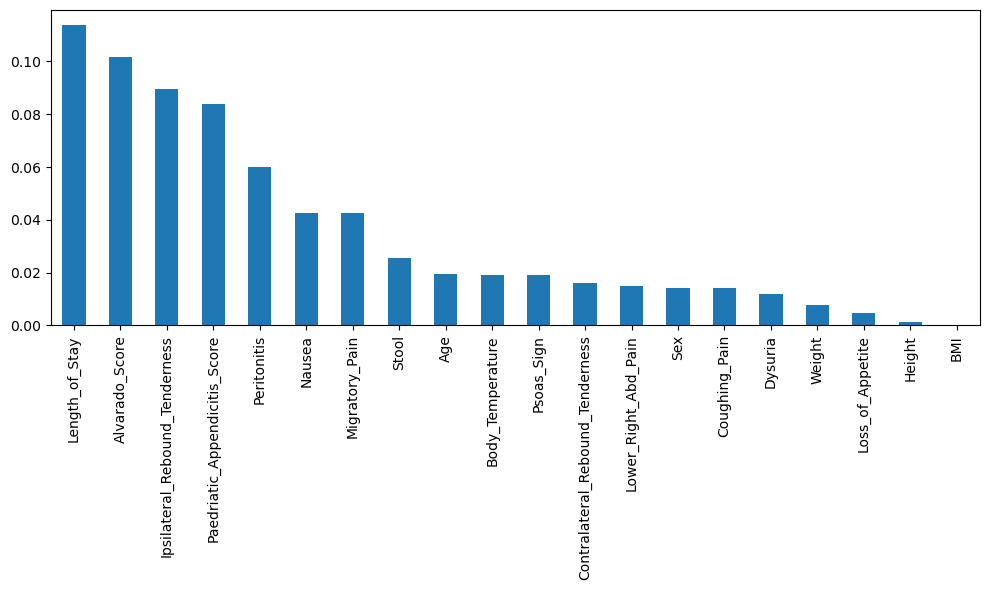

In [11]:
data_restricted = X[demographic + scoring + clinical]

importances = mutual_info_classif(data_restricted, y, random_state=123)
feat_importances = pd.Series(importances, X[demographic + scoring + clinical].columns[0:len(data_restricted.columns)])

feat_importances_sorted = feat_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
feat_importances_sorted.plot(kind="bar")
plt.tight_layout()
plt.show()

In [12]:
feat_importances_sorted = feat_importances.sort_values(ascending=False)
feat_importances_sorted.head(10)

Length_of_Stay                    0.113815
Alvarado_Score                    0.101710
Ipsilateral_Rebound_Tenderness    0.089431
Paedriatic_Appendicitis_Score     0.084074
Peritonitis                       0.059917
Nausea                            0.042721
Migratory_Pain                    0.042608
Stool                             0.025681
Age                               0.019549
Body_Temperature                  0.019108
dtype: float64

## Information Gain (Demographic + Scoring + Clinical + Laboratory)

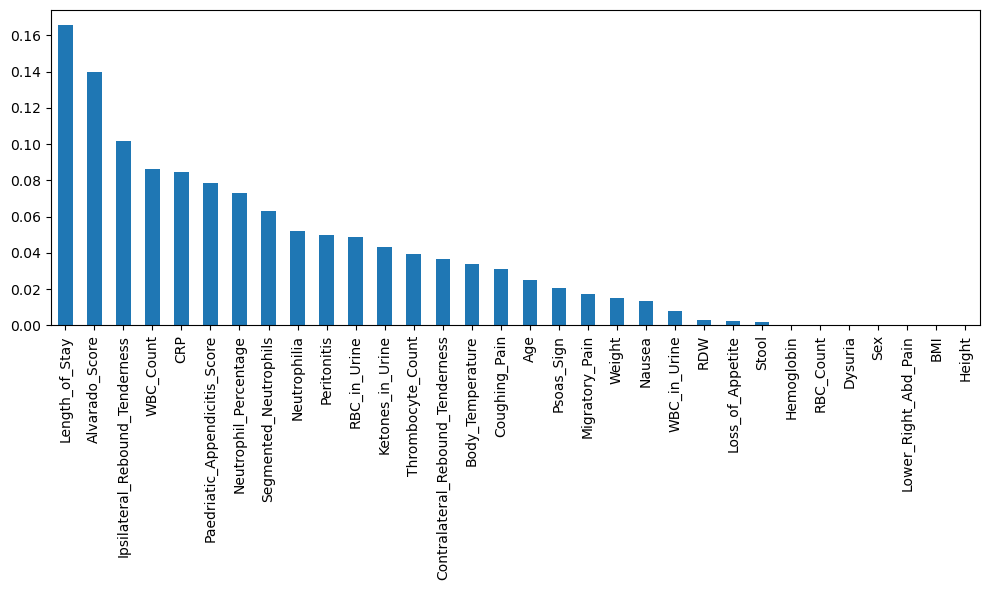

In [13]:
data_partially_restricted = X[demographic + scoring + clinical + laboratory]

importances = mutual_info_classif(data_partially_restricted, y, random_state=123)
feat_importances = pd.Series(importances, X[demographic + scoring + clinical + laboratory].columns[0:len(data_partially_restricted.columns)])

feat_importances_sorted = feat_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
feat_importances_sorted.plot(kind="bar")
plt.tight_layout()
plt.show()

In [14]:
feat_importances_sorted = feat_importances.sort_values(ascending=False)
feat_importances_sorted.head(15)

Length_of_Stay                      0.165754
Alvarado_Score                      0.140016
Ipsilateral_Rebound_Tenderness      0.101721
WBC_Count                           0.086058
CRP                                 0.084621
Paedriatic_Appendicitis_Score       0.078398
Neutrophil_Percentage               0.072821
Segmented_Neutrophils               0.063118
Neutrophilia                        0.052288
Peritonitis                         0.049775
RBC_in_Urine                        0.048842
Ketones_in_Urine                    0.043072
Thrombocyte_Count                   0.039316
Contralateral_Rebound_Tenderness    0.036913
Body_Temperature                    0.033845
dtype: float64

## Information Gain (Demographic + Scoring + Clinical + Laboratory + Ultrasound)

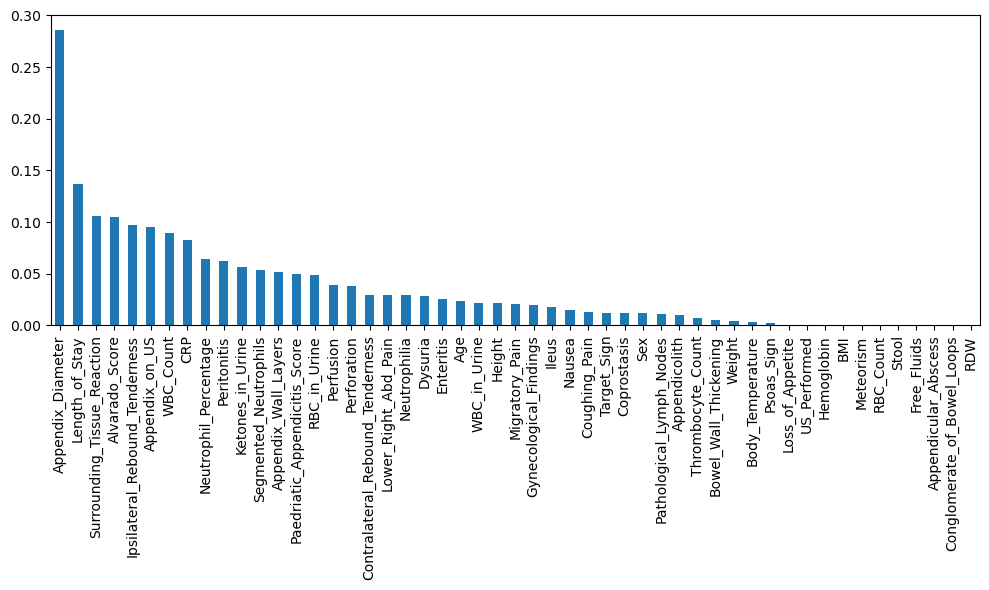

In [15]:
data_unrestricted = X[demographic + scoring + clinical + laboratory + ultrasound]

importances = mutual_info_classif(data_unrestricted, y, random_state=123)
feat_importances = pd.Series(importances, X[demographic + scoring + clinical + laboratory + ultrasound].columns[0:len(X.columns)])

feat_importances_sorted = feat_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
feat_importances_sorted.plot(kind="bar")
plt.tight_layout()
plt.show()

In [16]:
feat_importances_sorted = feat_importances.sort_values(ascending=False)
feat_importances_sorted.head(15)

Appendix_Diameter                 0.286111
Length_of_Stay                    0.136979
Surrounding_Tissue_Reaction       0.106102
Alvarado_Score                    0.104805
Ipsilateral_Rebound_Tenderness    0.097220
Appendix_on_US                    0.094786
WBC_Count                         0.089195
CRP                               0.082590
Neutrophil_Percentage             0.064256
Peritonitis                       0.062214
Ketones_in_Urine                  0.056557
Segmented_Neutrophils             0.053968
Appendix_Wall_Layers              0.051224
Paedriatic_Appendicitis_Score     0.050010
RBC_in_Urine                      0.048951
dtype: float64

# Unsupervised Feature Selection

## Principal Component Analysis

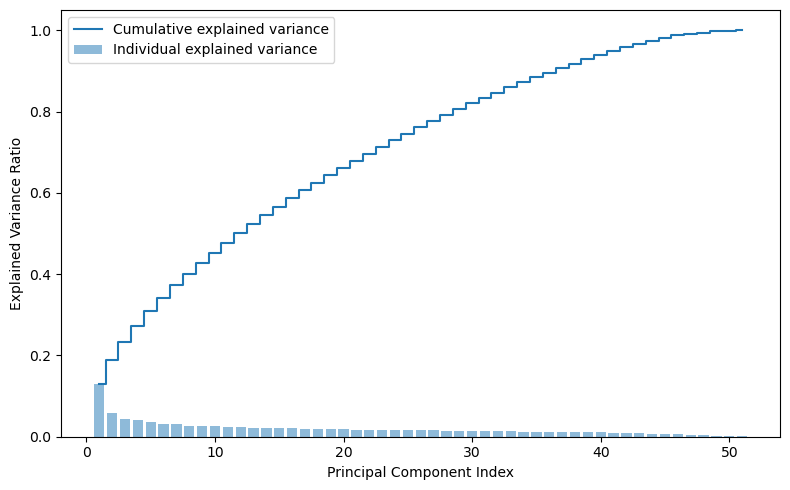

In [17]:
# Create a pipeline to standardize data and then apply PCA
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA())
])

X_pca = pipeline.fit_transform(X)

# The explained_variance_ratio_ gives us the variance contributed by each of the components
explained_variance = pipeline.named_steps['pca'].explained_variance_ratio_

plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance) + 1),
        explained_variance, alpha=0.5,
        align='center', label='Individual explained variance')
plt.step(range(1, len(explained_variance) + 1),
         np.cumsum(explained_variance),
         where='mid', label='Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Component Index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

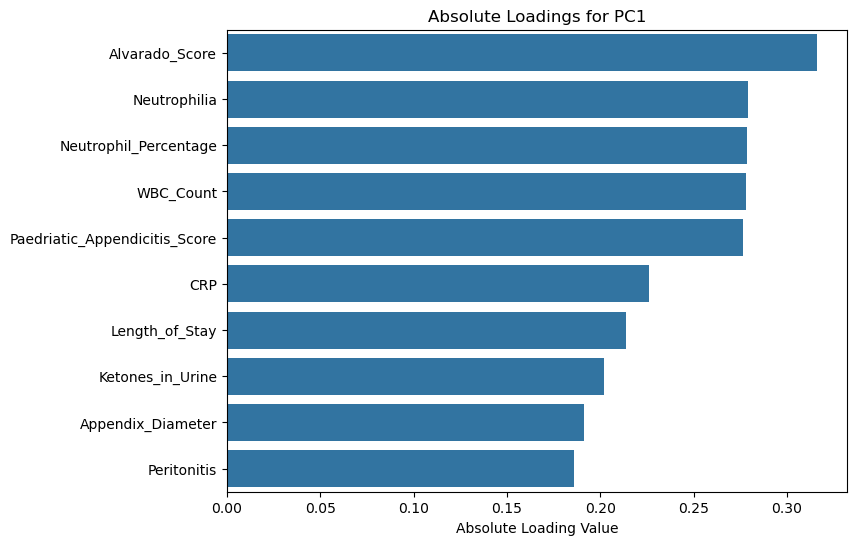

In [18]:
# Loadings of Principal Components
loadings = pipeline.named_steps['pca'].components_
n_components = 1

# df with loadings
loadings_df = pd.DataFrame(loadings[:n_components], columns=X.columns)
loadings_df = loadings_df.T

loadings_pc1 = loadings_df.iloc[:, 0].abs().sort_values(ascending=False).head(10)

plt.figure(figsize=(8, 6))
sns.barplot(x=loadings_pc1.values, y=loadings_pc1.index)

plt.title('Absolute Loadings for PC1')
plt.xlabel('Absolute Loading Value')
plt.ylabel('')
plt.show()

# Outlier Detection

In [19]:
continuous_variables = [
    "Age",
    "Height",
    "Weight",
    "BMI",
    "Length_of_Stay",
    "Body_Temperature",
    "WBC_Count",
    "RBC_Count",
    "Hemoglobin",
    "RDW",
    "Thrombocyte_Count",
    "Neutrophil_Percentage",
    "Segmented_Neutrophils",
    "CRP",
    "Appendix_Diameter"
]

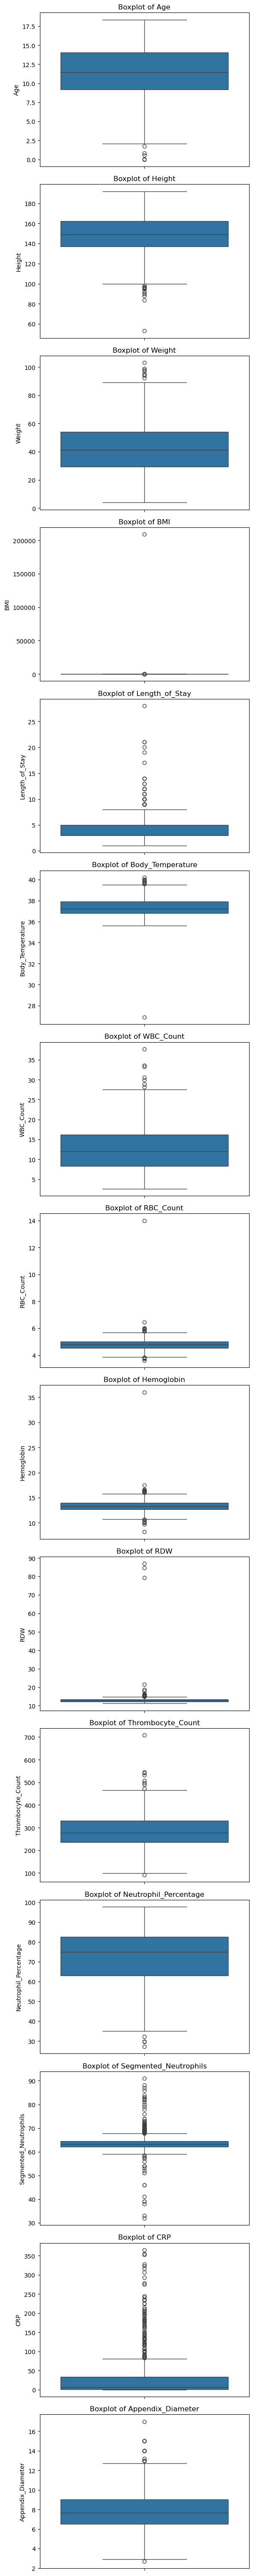

In [20]:
# Boxplots for all continuous variables
fig, axes = plt.subplots(nrows=len(continuous_variables), figsize=(6, 4 * len(continuous_variables)))

for i, var in enumerate(continuous_variables):
    sns.boxplot(data[var], ax=axes[i])
    axes[i].set_title(f'Boxplot of {var}')

plt.tight_layout()
plt.show()